<a href="https://colab.research.google.com/github/mkandrewhuang301/CS362/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Student Names and IDs**:

>Andrew Huang: ah629
>Jason Shang: zs110

All homework is to be submitted through Gradescope. For each submission, you will submit both a PDF file and a Jupyter notebook. We will usually grade your PDF file only (typically we will **NOT** run your code, so make sure you have all the results are displayed correctly) and the Jupyter notebook is for backup purpose (if we see something wrong in your code).

Homework is to be done either individually or in pairs, and working in pairs is strongly encouraged: This helps you discuss concepts and get unstuck when you encounter difficulties. It also helps us return your graded work earlier, since we'll have to read fewer assignments. No other groupings are allowed.

# Homework 4

We will use the same image burst we used in class for the following questions.

76
(186, 248, 4)


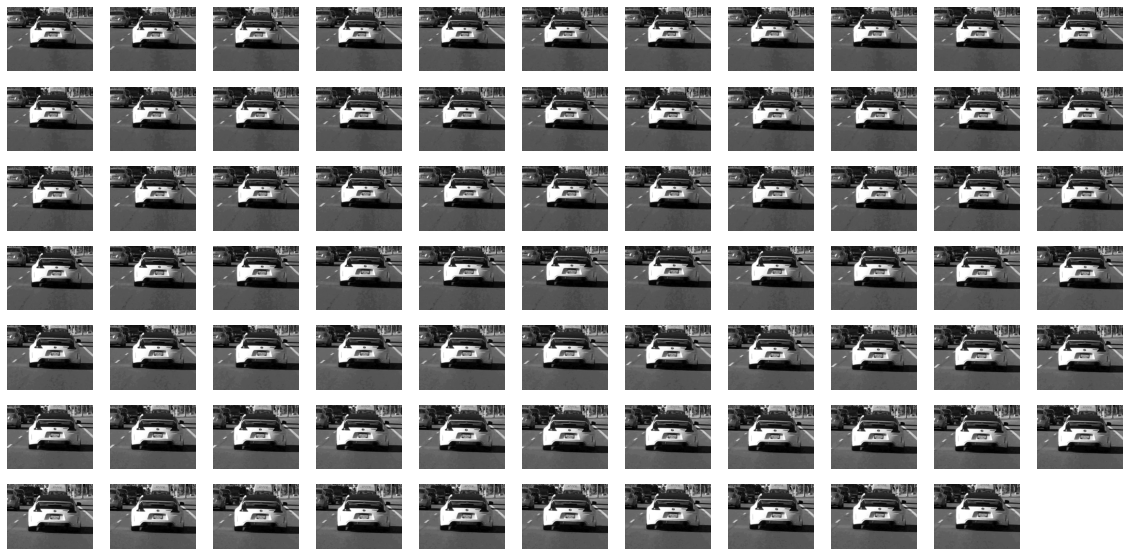

In [ ]:
import numpy, cv2
import matplotlib.pyplot as plt

import imageio, urllib.request

url = "https://i.stack.imgur.com/lui1A.gif"
fname = "tmp.gif"

imdata = urllib.request.urlopen(url).read()
open(fname,'wb+').write(imdata)

gif = imageio.mimread(fname)

imgs = [ cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in gif ]

print(len(gif))
print(gif[-1].shape)

fig = plt.figure(figsize=(20,10))

rows, cols = 7, 11
k = 0
for i in range(rows):

  for j in range(cols):
    while k < len(imgs):
      ax = plt.subplot(rows,cols,k+1)
      ax.imshow( imgs[k], cmap='gray' )
      ax.axis('off')
      k += 1

## Motion Estimation






### Question 1
We will first register these images using sparse optimal flow. Sparse optical flow selects a sparse feature set of pixels (e.g. interesting features such as edges and corners) to track its velocity vectors (motion). The extracted features are passed in the optical flow function from frame to frame to ensure that the same points are being tracked. To find good features, we will use `cv2.goodFeatureToTrack` from opencv. To correcly identify features in the first frame, you will need to try out different values for parameters in `cv2.goodFeatureToTrack`. Plot the selected features. Is there anything in common among all the selected features? (Note: Try to extract a total of less than 8 features, you can get better quality features by setting quality level to a higher value and make minDistance bigger to avoid redundancy)


### Answer

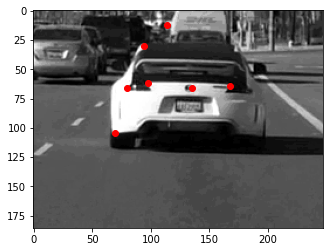

In [ ]:
import cv2
import numpy as np

###find good features to track, by experimenting good values to track
#cv2.goodFeaturesToTrack(image, maxCorners, qualityLevel, minDistance, [,mask[,blockSize[,useHarrisDetector[,k]]]])

features = cv2.goodFeaturesToTrack(imgs[0], 7,0.04, 15)
plt.imshow(imgs[0], cmap='gray')
for feature in features:
    x, y = feature.ravel()
    plt.scatter(x, y, color='red')
plt.show()

### Question 2
Now we will track the motion across all frames using the features we extracted in **Question 1**. Specifically, we will use `cv2.calcOpticalFlowPyrLK()`. This function has multiple parameters: window size, pyramid level, criteria, etc. For this question, we will use the parameters given below. The `cv2.calcOpticalFlowPyrLK()` function implements the Lucas-Kanade Optical flow motion tracking algorithm. The function has three outputs: the position of features in the following frame, the status of features (if the features are still present in the following frame) and an error. We will use the first two outputs. First, check if the extracted features are present in all 76 frames. Then, for every feature, track its location through the sequence until they are no longer present. Show the motion trajectories for each extracted feature. To do this, plot the first frame of the video sequence (using `cmap=plt.cm.gray`) and superimpose the trajectories as red lines. Also plot a red circle (`'or'`) at the beginning of each track. Did any feature disappear midway through the sequence?

In [ ]:

lk_params = dict(winSize = (20,20), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 15, 0.001))

### Answer

In [ ]:
from google.colab.patches import cv2_imshow
mask = np.zeros_like(imgs[0])
#for feature in features:
   # x, y = feature.ravel()
    #plt.scatter(x, y, color='red')
#plt.imshow(imgs[0], cmap='gray')

f_old = features

for x in range(0, 75):
  f_new,flag, err = cv2.calcOpticalFlowPyrLK(imgs[x],imgs[x+1],f_old, None,**lk_params)

  #getting points that passed for both new and old features
  good_new = f_new[flag == 1]
  good_old = f_old[flag == 1]
  #plotting points
  for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    print(a, b,c,d)
    mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), (0,0,255), 3)

  f_old = good_new.reshape(-1, 1, 2)

108.73144 62.083843 98.0 62.0
90.51973 33.319466 94.0 30.0
72.054504 68.97735 80.0 66.0
80.34625 101.5936 69.0 104.0
160.88107 63.429947 168.0 64.0
135.33328 66.57177 135.0 66.0
112.62315 11.617547 114.0 12.0
96.838066 62.07817 108.73144 62.083843
91.19328 33.066883 90.51973 33.319466
73.74453 68.14317 72.054504 68.97735
67.13591 103.89563 80.34625 101.5936
163.13908 63.650967 160.88107 63.429947
134.77017 66.65063 135.33328 66.57177
112.63529 11.688327 112.62315 11.617547
96.92999 61.239212 96.838066 62.07817
91.93634 32.139385 91.19328 33.066883
75.77544 66.572815 73.74453 68.14317
67.430885 103.47692 67.13591 103.89563
164.2944 62.948265 163.13908 63.650967
133.34578 65.74112 134.77017 66.65063
112.99719 10.665366 112.63529 11.688327
96.96801 60.884197 96.92999 61.239212
91.98894 31.591091 91.93634 32.139385
75.99268 65.70675 75.77544 66.572815
67.31358 102.960434 67.430885 103.47692
166.8374 62.714222 164.2944 62.948265
133.34041 65.06633 133.34578 65.74112
113.57674 10.1422415 112

## Image Fusion

### Question 3
Now, we will select one feature out of all the extracted features (select a feature that does not disappear). Use the seleted feature and its estimated position in all frames to calculate relative motion across all frames (use the option that gave more accurate estimation of the ones you calculated in **Question 2**). You will use the first frame as reference and calculate the relative motion between the reference frame and all other frames. (The reason we are doing this is that the output from **Question 2** only gives you the position of features for each frame. It does not directly tell you the relative motion across frames).

In [ ]:
feature[0]

motion = []
orig_x, orig_y = trajectories[0][0].ravel()

for x in range(1, 76):
  nx, ny = trajectories[x].ravel()
  dx = nx - orig_x
  dy = ny - orig_y
  motion.append((dx, dy))


NameError: ignored

### Answer

### Question 4
Fuse all frames into a single frame using the translation vectors you calculated in **Question 3** and plot the result. Also, plot the corresponding result by simply merging all frames without any motion compensation. Comment on the differences between two merged frames.

### Answer

In [ ]:
average = np.zeros_like(imgs[0], dtype='f')
first_average = np.zeros_like(imgs[0], dtype='f')
###alignment
nr, nc = imgs[0].shape
cumulative_motion = np.cumsum(np.array(motion), axis=0)

for f in range( len(imgs) ):
  T = np.float32([[1, 0, cumulative_translations[i, 0]], [0, 1, cumulative_translations[i, 1]]])
  aligned_frame = cv2.warpAffine( imgs[f], T, (nc,nr) )
  first_average += aligned_frame


#ax1.imshow(imgs[0], cmap='gray')
for i in range(len(imgs)):
  average += imgs[i]
fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), ncols=2)

plt.title("unaligned frame average")
ax1.imshow(first_average, cmap='gray')
ax2.imshow(average, cmap='gray')

NameError: ignored

## Noise Suppresion

### Question 5
We will now investigate how burst photography can reduce the effect of noise. To do this, first, we will corrupt all the frames from the car sequence with Gaussian noise $\mu = 0, \sigma = 0.5$. You will first normalize all the images to the range $[0,1]$ and then plot all the corrupted frames.

### Answer

In [ ]:
def normalize(img):
     result = (img - numpy.min(img))/(numpy.max(img) - numpy.min(img))
     return result
def add_gaussian_noise(img, mean, sigma):
   img = numpy.float32(img)
   print(img.dtype)
   gaussian  = numpy.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
   result = img + gaussian
   return result;
for x in range(0, 76):
  imgs[x] = normalize(imgs[x])
  imgs[x] = add_gaussian_noise(imgs[x], 0, 0.5)
  plt.imshow(imgs[x], cmap = "gray")
  plt.show()

float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32
float32


### Question 6

We will now repeat the image fusion we did in **Question 4**. Instead of using clean frames, this time, we will use noise corrupted frames we got in **Question 5**. We will use the same motion vectors as in **Question 4**. Plot the fused frame and the reference frame (which is the first noisy image). Are you able to reduce noise by merging frames?

### Answer

## Further image enhancement

### Question 7
In order to enhance the fused image, we will apply non-local means (NLM) denoising as we did in homework 1. Denoise the fused image and plot the result. Try to improve the fused image using at least one other enhancement technique and plot the result.

### Answer

In [ ]:
def LoG(img, kernel, sigma):
  blur_img = cv2.GaussianBlur(img, (kernel, kernel), sigma)
  return cv2.Laplacian(blur_img,ddepth = -1, ksize = kernel)


In [ ]:

##Assume fused image name is fused_img
nlm_fused_img = cv2.bilateralFilter(fused__img, 10, 1, 3);

LoG_img = LoG(noisy_img, 3, 0.1)
##sharpen image
sharpen_fused = nlm_fused_img + + (-0.3* LoG(nlm_fused_img, kernel = 3, sigma = 0.1))


plt.title("Sharpened Image")
plt.imshow(sharpen_fused, cmap = "gray")
plt.show()